In [1]:
# Step 1: Load and Prepare Dataset
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [2]:

df = pd.read_csv('Data.csv')


 Step 2: First Glance at Data

In [3]:
print("Shape:", df.shape)


Shape: (48842, 15)


In [4]:
print("Column Types:\n", df.dtypes)

Column Types:
 age                 int64
workclass          object
fnlwgt              int64
education          object
educational-num     int64
marital-status     object
occupation         object
relationship       object
race               object
gender             object
capital-gain        int64
capital-loss        int64
hours-per-week      int64
native-country     object
income             object
dtype: object


In [5]:
df.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K


Show basic info

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              48842 non-null  int64 
 1   workclass        48842 non-null  object
 2   fnlwgt           48842 non-null  int64 
 3   education        48842 non-null  object
 4   educational-num  48842 non-null  int64 
 5   marital-status   48842 non-null  object
 6   occupation       48842 non-null  object
 7   relationship     48842 non-null  object
 8   race             48842 non-null  object
 9   gender           48842 non-null  object
 10  capital-gain     48842 non-null  int64 
 11  capital-loss     48842 non-null  int64 
 12  hours-per-week   48842 non-null  int64 
 13  native-country   48842 non-null  object
 14  income           48842 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB


In [7]:
print("Wrong data Values Count:\n", df.isin(['?']).sum())

Wrong data Values Count:
 age                   0
workclass          2799
fnlwgt                0
education             0
educational-num       0
marital-status        0
occupation         2809
relationship          0
race                  0
gender                0
capital-gain          0
capital-loss          0
hours-per-week        0
native-country      857
income                0
dtype: int64


In [8]:
df.describe()

,age,fnlwgt,educational-num,capital-gain,capital-loss,hours-per-week
count,48842.000000,4.884200e+04,48842.000000,48842.000000,48842.000000,48842.000000
mean,38.643585,1.896641e+05,10.078089,1079.067626,87.502314,40.422382
std,13.710510,1.056040e+05,2.570973,7452.019058,403.004552,12.391444
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.175505e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.781445e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.376420e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.490400e+06,16.000000,99999.000000,4356.000000,99.000000


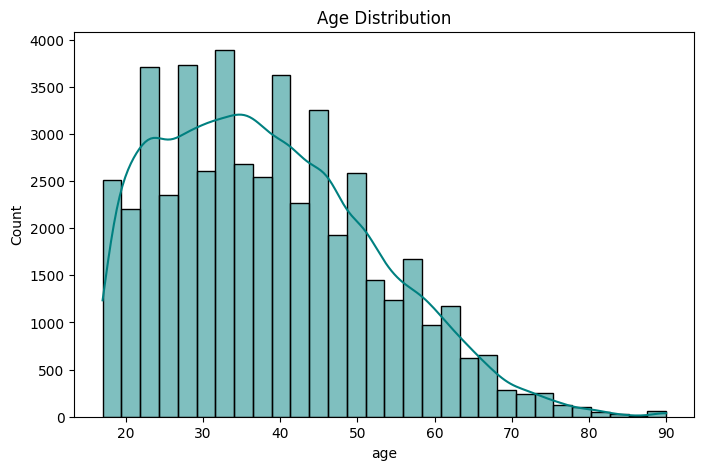

In [9]:
# Age Distribution
plt.figure(figsize=(8,5))
sns.histplot(df['age'], bins=30, kde=True, color='teal')
plt.title("Age Distribution")
plt.show()

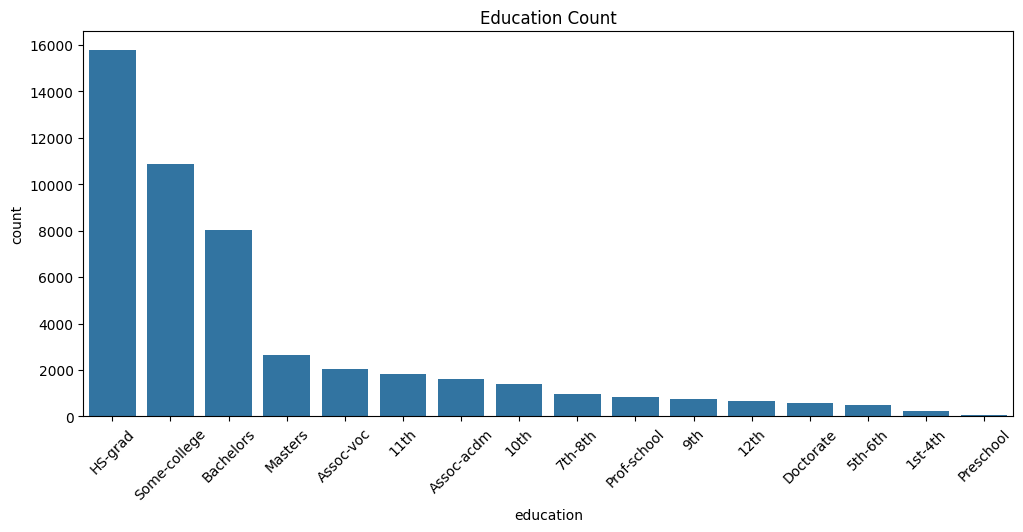

In [10]:

# Education Levels
plt.figure(figsize=(12,5))
sns.countplot(data=df, x='education', order=df['education'].value_counts().index)
plt.xticks(rotation=45)
plt.title("Education Count")
plt.show()


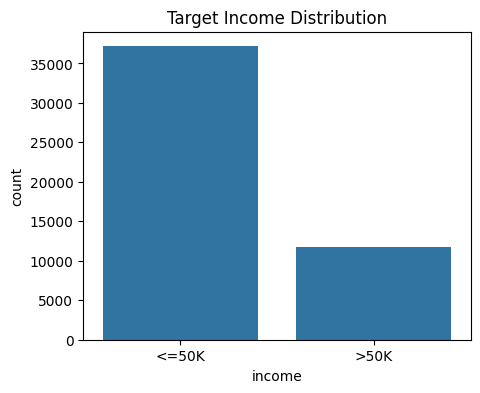

In [11]:

# Income Distribution
plt.figure(figsize=(5,4))
sns.countplot(data=df, x='income')
plt.title("Target Income Distribution")
plt.show()

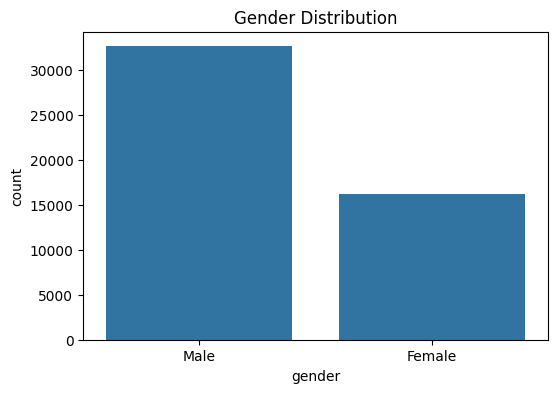

In [12]:

# Gender Distribution
plt.figure(figsize=(6,4))
sns.countplot(data=df, x='gender')
plt.title("Gender Distribution")
plt.show()

 Step 3: Bivariate Visualizations

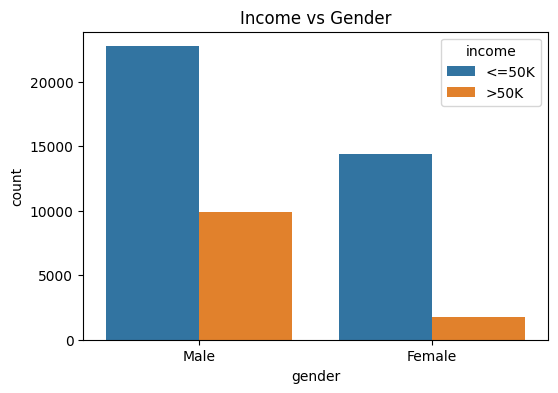

In [13]:
# Income by Gender
plt.figure(figsize=(6,4))
sns.countplot(data=df, x='gender', hue='income')
plt.title("Income vs Gender")
plt.show()

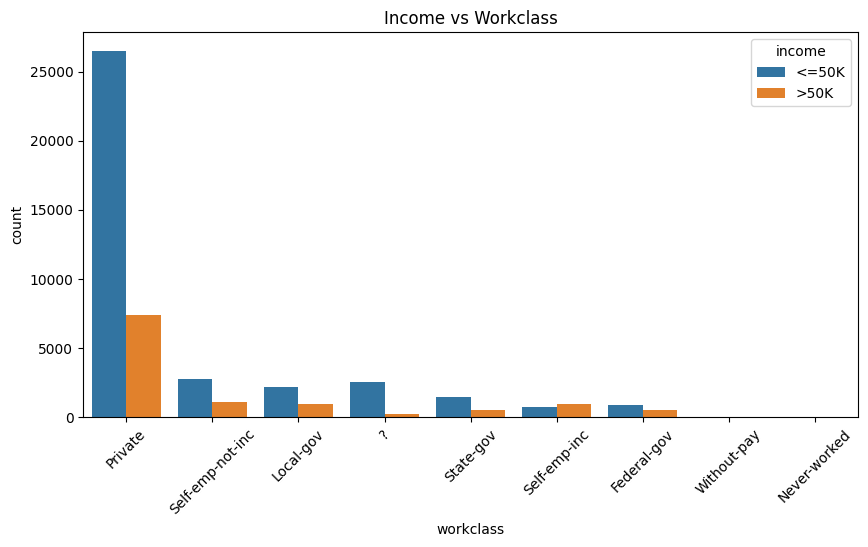

In [14]:

# Income by Workclass
plt.figure(figsize=(10,5))
sns.countplot(data=df, x='workclass', hue='income', order=df['workclass'].value_counts().index)
plt.xticks(rotation=45)
plt.title("Income vs Workclass")
plt.show()

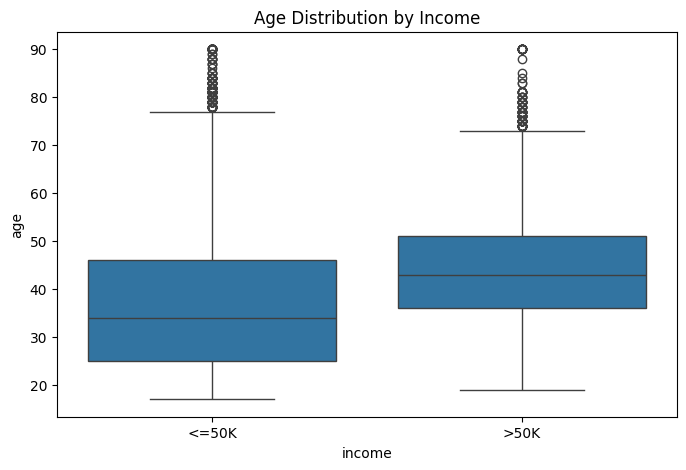

In [15]:

# Boxplot: Age vs Income
plt.figure(figsize=(8,5))
sns.boxplot(data=df, x='income', y='age')
plt.title("Age Distribution by Income")
plt.show()

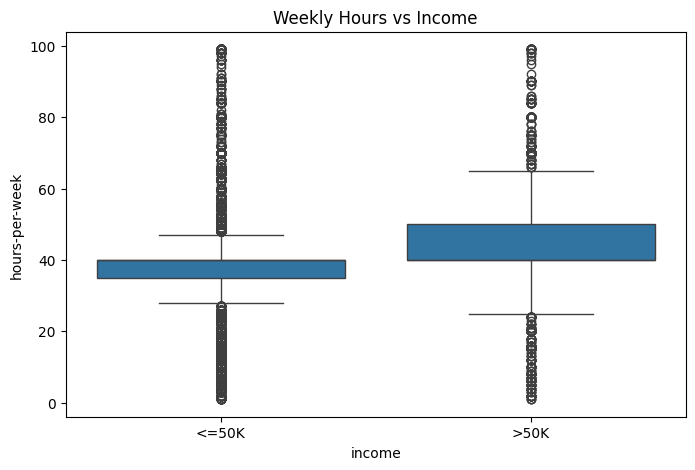

In [16]:

# Boxplot: Hours Worked vs Income
plt.figure(figsize=(8,5))
sns.boxplot(data=df, x='income', y='hours-per-week')
plt.title("Weekly Hours vs Income")
plt.show()


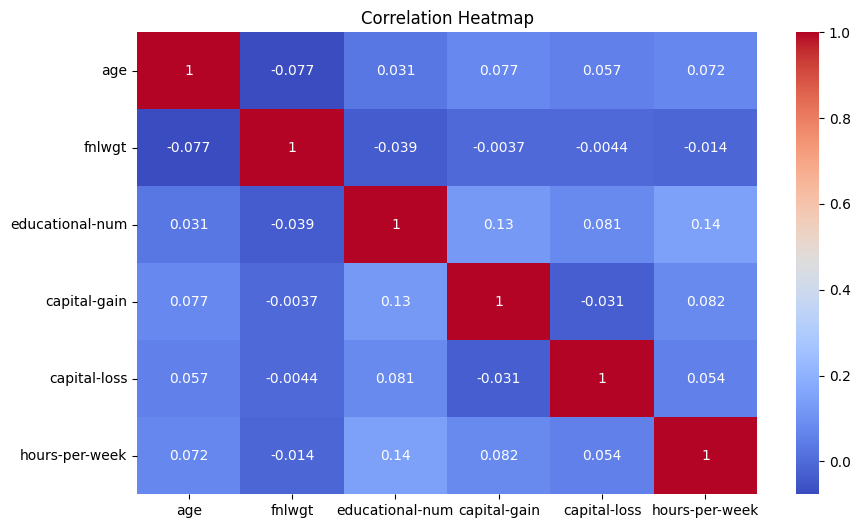

In [17]:

# Step 4: Correlation Matrix (numeric only)
numeric_df = df.select_dtypes(include=['int64', 'float64'])
plt.figure(figsize=(10,6))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()